In [78]:
# Common Data Errors Examples

# 1. Missing Data:
# Task 1: Review a dataset where some customer emails are missing. Identify how
# many records are incomplete.
# Task 2: Examine a sales dataset with missing transaction dates and determine the
# percentage of missing data.
# Task 3: Identify missing department information in an employee registry.






# 2. Duplicate Data:
# Task 1: Analyze a customer dataset with duplicate entries and count the number of
# duplicates.
# Task 2: Review supplier data and identify any repeated supplier names.
# Task 3: Examine a product inventory list for duplicates in product IDs.






# 3. Inconsistent Formatting:
# Task 1: Spot inconsistencies in date formats (e.g., DD/MM/YYYY vs. MM/DD/YYYY)
# in a dataset.
# Task 2: Identify phone numbers with varying formats in a contact list.
# Task 3: Review address data for discrepancies in state abbreviations (e.g., CA vs.
# Calif.).





# 4. Data Drift:
# Task 1: Compare monthly revenues over six months to identify data drift.
# Task 2: Analyze user engagement metrics from a web application over different
# quarters.
# Task 3: Review a stock price dataset to detect any anomalies over a year.





In [79]:
import pandas as pd

# Example customer dataset
data = {'CustomerID': [1, 2, 3, 4],
        'Email': ['alice@example.com', None, 'charlie@example.com', None]}
df = pd.DataFrame(data)

# Step: Count missing emails
missing_emails = df['Email'].isna().sum()
print(f"Number of records with missing Email: {missing_emails}")


Number of records with missing Email: 2


In [80]:
# Example sales dataset
sales_data = {'TransactionID': [101, 102, 103, 104],
              'TransactionDate': ['2023-01-01', None, '2023-01-03', None]}
df_sales = pd.DataFrame(sales_data)

# Step: Calculate percentage missing
missing_dates_pct = df_sales['TransactionDate'].isna().mean() * 100
print(f"Percentage of missing transaction dates: {missing_dates_pct:.2f}%")


Percentage of missing transaction dates: 50.00%


In [81]:
employee_data = {'EmployeeID': [1, 2, 3, 4],
                 'Department': ['HR', 'Finance', None, 'Marketing']}
df_emp = pd.DataFrame(employee_data)

# Step: List rows with missing department
missing_dept_rows = df_emp[df_emp['Department'].isna()]
print("Rows with missing Department info:")
print(missing_dept_rows)


Rows with missing Department info:
   EmployeeID Department
2           3       None


In [82]:
customer_data = {'CustomerID': [1, 2, 2, 3, 4, 4],
                 'Name': ['Alice', 'Bob', 'Bob', 'Charlie', 'David', 'David']}
df_cust = pd.DataFrame(customer_data)

# Step: Identify duplicates based on all columns
duplicate_rows = df_cust.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")


Number of duplicate rows: 2


In [83]:
supplier_data = {'SupplierID': [101, 102, 103, 104],
                 'SupplierName': ['Acme Inc', 'Global Corp', 'Acme Inc', 'Delta LLC']}
df_sup = pd.DataFrame(supplier_data)

# Step: Find duplicate supplier names
duplicate_suppliers = df_sup[df_sup.duplicated(subset=['SupplierName'], keep=False)]
print("Duplicate supplier names:")
print(duplicate_suppliers)


Duplicate supplier names:
   SupplierID SupplierName
0         101     Acme Inc
2         103     Acme Inc


In [84]:
inventory = {'ProductID': [1001, 1002, 1003, 1002, 1004, 1001],
             'ProductName': ['Widget A', 'Widget B', 'Widget C', 'Widget B', 'Widget D', 'Widget A']}
df_inv = pd.DataFrame(inventory)

# Step: List duplicate ProductIDs
duplicate_products = df_inv[df_inv.duplicated(subset=['ProductID'], keep=False)]
print("Duplicate product IDs:")
print(duplicate_products)


Duplicate product IDs:
   ProductID ProductName
0       1001    Widget A
1       1002    Widget B
3       1002    Widget B
5       1001    Widget A


In [85]:
date_data = {'Date': ['01/12/2023', '12/01/2023', '2023-01-15', '15-01-2023']}
df_dates = pd.DataFrame(date_data)

# Step: Attempt parsing to detect inconsistent formats
def try_parse_date(date_str):
    for fmt in ("%d/%m/%Y", "%m/%d/%Y", "%Y-%m-%d", "%d-%m-%Y"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except:
            continue
    return pd.NaT

df_dates['ParsedDate'] = df_dates['Date'].apply(try_parse_date)
print(df_dates)
print("\nRows with unparsed or inconsistent dates:")
print(df_dates[df_dates['ParsedDate'].isna()])


         Date ParsedDate
0  01/12/2023 2023-12-01
1  12/01/2023 2023-01-12
2  2023-01-15 2023-01-15
3  15-01-2023 2023-01-15

Rows with unparsed or inconsistent dates:
Empty DataFrame
Columns: [Date, ParsedDate]
Index: []


In [86]:
phones = {'Phone': ['123-456-7890', '(123) 456-7890', '1234567890', '+1 123 456 7890']}
df_phones = pd.DataFrame(phones)

# Step: Normalize phone formats by removing non-digit characters
df_phones['DigitsOnly'] = df_phones['Phone'].str.replace(r'\D', '', regex=True)
print(df_phones)


             Phone   DigitsOnly
0     123-456-7890   1234567890
1   (123) 456-7890   1234567890
2       1234567890   1234567890
3  +1 123 456 7890  11234567890


In [87]:
addresses = {'State': ['CA', 'Calif.', 'NY', 'N.Y.', 'TX', 'Texas']}
df_addr = pd.DataFrame(addresses)

# Step: Create mapping dictionary to unify abbreviations
state_map = {'Calif.': 'CA', 'N.Y.': 'NY', 'Texas': 'TX'}

df_addr['StandardizedState'] = df_addr['State'].replace(state_map)
print(df_addr)


    State StandardizedState
0      CA                CA
1  Calif.                CA
2      NY                NY
3    N.Y.                NY
4      TX                TX
5   Texas                TX


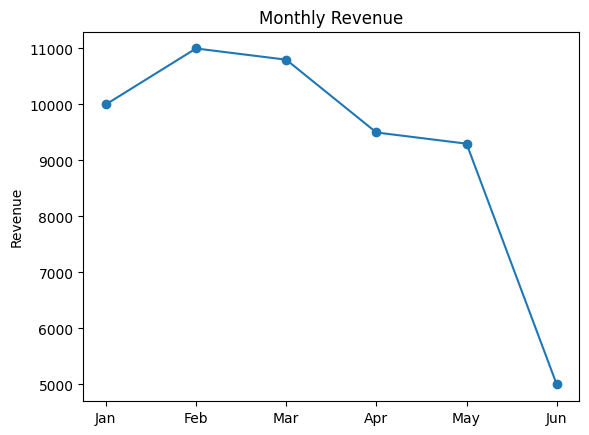

Revenue drops between months:
0       NaN
1    1000.0
2    -200.0
3   -1300.0
4    -200.0
5   -4300.0
Name: Revenue, dtype: float64


In [88]:
import matplotlib.pyplot as plt

revenue = {'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
           'Revenue': [10000, 11000, 10800, 9500, 9300, 5000]}
df_revenue = pd.DataFrame(revenue)

# Step: Plot revenue over time
plt.plot(df_revenue['Month'], df_revenue['Revenue'], marker='o')
plt.title('Monthly Revenue')
plt.ylabel('Revenue')
plt.show()

# Step: Identify sudden drop (potential drift)
print("Revenue drops between months:")
print(df_revenue['Revenue'].diff())


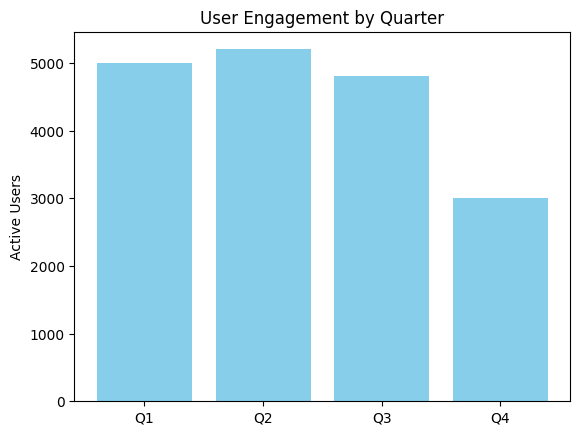

In [89]:
engagement = {'Quarter': ['Q1', 'Q2', 'Q3', 'Q4'],
              'ActiveUsers': [5000, 5200, 4800, 3000]}
df_eng = pd.DataFrame(engagement)

plt.bar(df_eng['Quarter'], df_eng['ActiveUsers'], color='skyblue')
plt.title('User Engagement by Quarter')
plt.ylabel('Active Users')
plt.show()


/tmp/ipykernel_4852/2423317592.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_prices = {'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),


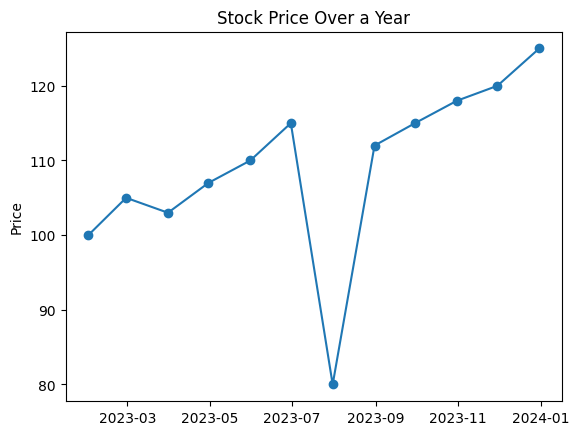

Price changes month over month:
0      NaN
1      5.0
2     -2.0
3      4.0
4      3.0
5      5.0
6    -35.0
7     32.0
8      3.0
9      3.0
10     2.0
11     5.0
Name: Price, dtype: float64


In [90]:
stock_prices = {'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
                'Price': [100, 105, 103, 107, 110, 115, 80, 112, 115, 118, 120, 125]}
df_stock = pd.DataFrame(stock_prices)

plt.plot(df_stock['Date'], df_stock['Price'], marker='o')
plt.title('Stock Price Over a Year')
plt.ylabel('Price')
plt.show()

# Step: Detect anomaly (sharp drop)
print("Price changes month over month:")
print(df_stock['Price'].diff())
